**Algoritam k najblizih suseda (kNN)** je jedan od najednostavnijih algoritama koji se moze koristiti za klasifikaciju sa proizvoljnim brojem klasa, kao i za regresiju. Osnovna pretpostavka ovog algoritma je postojanje rastojanja (metrike) nad
prostorom atributa.

Algoritam k najblizih suseda klasifikuje nepoznatu instancu tako sto pronalazi k instanci iz skupa za treniranje koje su joj najblize u smislu neke izabrane metrike i pridruzuje joj vecinsku klasu. U slucaju regresije tipicno uzima prosecnu vrednost ciljne promenljive najblizih suseda.

<img src='knn.png'>

**Prednosti:**
* samo izbor hiperparametra k (regularizacioni)
* proizvoljne granice klasa
<br>

**Mane:**
* nema optimizacioni metod
* moraju se cuvati (skoro) sve instance

### Implementacija

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

Koristimo poznati breast cancer dataset koji ima numericke prediktore i kategoricku ciljnu promenljivu tako da u ovom slucaju primenjujemo kNN algoritam za problem klasifikacije.

In [3]:
data = datasets.load_breast_cancer()

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
X = pd.DataFrame(data.data, columns = data.feature_names)

In [7]:
X.shape

(569, 30)

In [8]:
X.info() # nema nedostajucih i cudnih tipova podataka

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
y = data.target

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state = 25)

In [14]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

kNN model mozemo implementirati koristeci `neighbors` modul:

In [15]:
from sklearn import neighbors

In [16]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5) # treniramo model sa konkretnim parametrom k, 
# a sledeci cas radimo izbor optimalnog hiperparametra modela koristeci validacioni skup!!!

In [17]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [20]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 59,   5],
       [  1, 106]], dtype=int64)

### Izbor parametra k - Elbow method

In [21]:
error_rate = []
for i in range(1, 5): 
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

In [22]:
error_rate

[0.03508771929824561,
 0.03508771929824561,
 0.029239766081871343,
 0.029239766081871343]

Text(0, 0.5, 'Error')

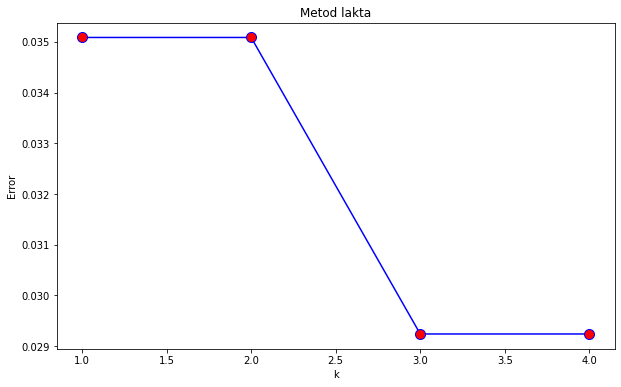

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 5), error_rate, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Metod lakta')
plt.xlabel('k')
plt.ylabel('Error')

In [24]:
# Finalni model sa parametrom k=3
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [25]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn_model.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [28]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 60,   4],
       [  1, 106]], dtype=int64)

Probacemo i **bagging algoritam** tako sto cemo napraviti ansambl gde je bazni klasifikator kNN da uporedimo rezulteate:

In [29]:
from sklearn import ensemble

In [30]:
model_knn_ensemble = ensemble.BaggingClassifier(neighbors.KNeighborsClassifier(n_neighbors=3), n_estimators=100, bootstrap=True, random_state=42)

In [31]:
model_knn_ensemble.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100, random_state=42)

In [32]:
y_pred = model_knn_ensemble.predict(X_test)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 60,   4],
       [  1, 106]], dtype=int64)